<a href="https://colab.research.google.com/github/Atarazona11/assignment_one/blob/main/Final_Assignment_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install requests

In [ ]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

In [ ]:
import time
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns

In [ ]:
df= pd.DataFrame()

In [ ]:
api_key = "EedyojvkRBjd1wuSnNFIPrr8NULbuVzxQZqFqOqXVuW0iKjQ1VND0gF93j6T"

links = "https://api.nasa.gov/planetary/apod?api_key=skgYzEaEFJaO9mxPVi0jJK8mkgEmIAGz6hwKPnPF"
#link = "https://soccer.sportmonks.com/api/v2.0/seasons/8?api_token=EedyojvkRBjd1wuSnNFIPrr8NULbuVzxQZqFqOqXVuW0iKjQ1VND0gF93j6T"
#link = "https://soccer.sportmonks.com/api/v2.0/standings/season/17420?api_token=EedyojvkRBjd1wuSnNFIPrr8NULbuVzxQZqFqOqXVuW0iKjQ1VND0gF93j6T"
link = "https://soccer.sportmonks.com/api/v2.0/leagues?api_token=EedyojvkRBjd1wuSnNFIPrr8NULbuVzxQZqFqOqXVuW0iKjQ1VND0gF93j6T&include=seasons,country,season,"

response = requests.get(link)

In [ ]:
print(resp.status_code)

200


In [ ]:
resp_object = response.json()
print(resp_object)

{'data': [{'id': 2, 'active': True, 'type': 'cup_international', 'legacy_id': 11, 'country_id': 41, 'logo_path': 'https://cdn.sportmonks.com/images/soccer/leagues/2.png', 'name': 'Champions League', 'is_cup': True, 'is_friendly': False, 'current_season_id': 18346, 'current_round_id': None, 'current_stage_id': 77453618, 'live_standings': True, 'coverage': {'predictions': True, 'topscorer_goals': True, 'topscorer_assists': True, 'topscorer_cards': True}, 'seasons': {'data': [{'id': 5307, 'name': '2005/2006', 'league_id': 2, 'is_current_season': False, 'current_round_id': None, 'current_stage_id': None}, {'id': 5308, 'name': '2006/2007', 'league_id': 2, 'is_current_season': False, 'current_round_id': None, 'current_stage_id': None}, {'id': 5309, 'name': '2007/2008', 'league_id': 2, 'is_current_season': False, 'current_round_id': None, 'current_stage_id': None}, {'id': 5310, 'name': '2008/2009', 'league_id': 2, 'is_current_season': False, 'current_round_id': None, 'current_stage_id': None}

In [ ]:
resp_data = pd.json_normalize(resp_object['data'])

In [ ]:
team = resp_data['id']

In [ ]:
resp_data = resp_data[['type', 'legacy_id', 'country_id', 'name']]

In [ ]:
name = resp_data['name']
iden = resp_data['country_id']
legac = resp_data['legacy_id']

In [ ]:
resp_data.head()

,type,legacy_id,country_id,name
0,cup_international,11.0,41,Champions League
1,cup_international,12.0,41,Europa League
2,domestic,29.0,462,Premier League
3,domestic,30.0,462,Championship
4,domestic_cup,33.0,462,FA Cup


In [ ]:
df1=resp_data
print(resp_data)

                 type  legacy_id  country_id                          name
0   cup_international       11.0          41              Champions League
1   cup_international       12.0          41                 Europa League
2            domestic       29.0         462                Premier League
3            domestic       30.0         462                  Championship
4        domestic_cup       33.0         462                        FA Cup
5            domestic        1.0          38                    Eredivisie
6            domestic        4.0          11                    Bundesliga
7            domestic       54.0         143            Admiral Bundesliga
8            domestic        8.0         556                    Pro League
9            domestic      139.0         266                        1. HNL
10           domestic       43.0         320                     Superliga
11           domestic       47.0          17                       Ligue 1
12           domestic    

In [ ]:
df1= df1.dropna()

In [ ]:
df = pd.concat([df,df1],ignore_index=True, sort=False)
df_style = df.describe().style.background_gradient()
df_style

,legacy_id,country_id
count,50.000000,50.000000
mean,42.480000,278.880000
std,35.704136,372.448634
min,1.000000,2.000000
25%,19.000000,38.000000
50%,33.000000,143.000000
75%,52.000000,404.000000
max,139.000000,1578.000000


In [ ]:
print (df)

                 type  legacy_id  country_id                name
0   cup_international       11.0          41    Champions League
1   cup_international       12.0          41       Europa League
2            domestic       29.0         462      Premier League
3            domestic       30.0         462        Championship
4        domestic_cup       33.0         462              FA Cup
5            domestic        1.0          38          Eredivisie
6            domestic        4.0          11          Bundesliga
7            domestic       54.0         143  Admiral Bundesliga
8            domestic        8.0         556          Pro League
9            domestic      139.0         266              1. HNL
10           domestic       43.0         320           Superliga
11           domestic       47.0          17             Ligue 1
12           domestic       22.0         251             Serie A
13       domestic_cup       24.0         251        Coppa Italia
14           domestic    

,legacy_id,country_id
count,25.000000,25.000000
mean,42.480000,278.880000
std,36.074137,376.308309
min,1.000000,2.000000
25%,19.000000,38.000000
50%,33.000000,143.000000
75%,52.000000,404.000000
max,139.000000,1578.000000


In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


legacy_id      42.48
country_id    278.88
dtype: float64

In [ ]:
df.describe()
df_style = df.describe().style.background_gradient()
df_style

,legacy_id,country_id
count,25.000000,25.000000
mean,42.480000,278.880000
std,36.074137,376.308309
min,1.000000,2.000000
25%,19.000000,38.000000
50%,33.000000,143.000000
75%,52.000000,404.000000
max,139.000000,1578.000000


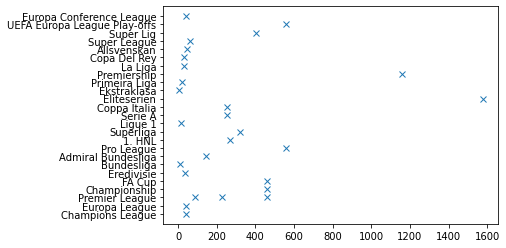

In [ ]:
plt.plot(iden, name, 'x')
plt.savefig('prem_league.png')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


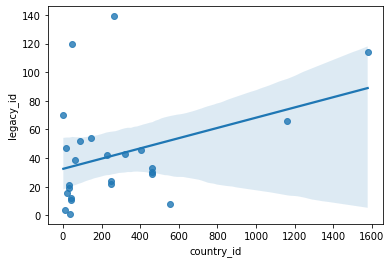

In [ ]:
sns.regplot(iden, legac)